In [23]:
# 일단 폭염일 때 가장 많은 질병 10개를 골라야함.

import pandas as pd
join = pd.read_csv("진료내역_온도_join.csv")
join.head()

,Unnamed: 0,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,최고기온
0,0,2022,323087,671512,2,14,41,2022-03-25,3,1,I10,E785,1,1,0.15,12130,1500,10630,0,17.6
1,1,2022,661178,195643,2,15,41,2022-03-25,3,1,M17,M5440,1,1,0.15,12130,1500,10630,0,17.6
2,2,2022,49859,79868,2,14,41,2022-03-25,3,1,I10,L2085,1,1,0.15,12130,1500,10630,90,17.6
3,3,2022,976687,280439,2,14,41,2022-03-25,3,1,I10,K297,1,1,0.15,12130,1500,10630,5,17.6
4,4,2022,542027,907728,2,14,41,2022-03-25,3,1,I10,H814,1,1,0.15,12130,1500,10630,30,17.6


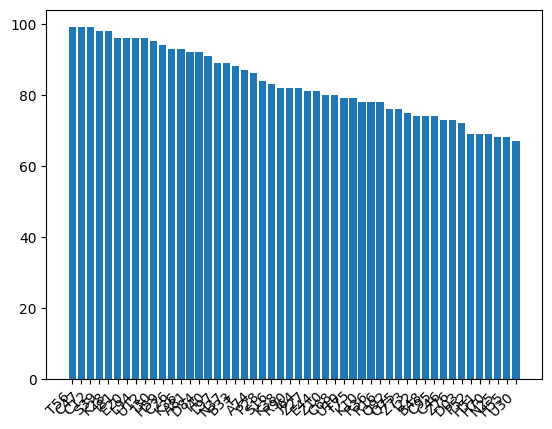

In [24]:

import matplotlib.pyplot as plt

# 표본이 100개 미만인 거는 절삭
join_del100 = join.value_counts("주상병코드")
    
x_bar = []
y_bar = []

for i in join_del100.index:
    if join_del100[i] < 100:
        x_bar.append(i)
        y_bar.append(join_del100[i])
        

plt.bar(x_bar[:50], y_bar[:50])
plt.xticks(rotation=45, ha='right')
plt.show()



In [25]:
# 한 20분 걸리네
for x in x_bar:
    join = join[join.주상병코드 != x]

join.head()

,Unnamed: 0,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,최고기온
0,0,2022,323087,671512,2,14,41,2022-03-25,3,1,I10,E785,1,1,0.15,12130,1500,10630,0,17.6
1,1,2022,661178,195643,2,15,41,2022-03-25,3,1,M17,M5440,1,1,0.15,12130,1500,10630,0,17.6
2,2,2022,49859,79868,2,14,41,2022-03-25,3,1,I10,L2085,1,1,0.15,12130,1500,10630,90,17.6
3,3,2022,976687,280439,2,14,41,2022-03-25,3,1,I10,K297,1,1,0.15,12130,1500,10630,5,17.6
4,4,2022,542027,907728,2,14,41,2022-03-25,3,1,I10,H814,1,1,0.15,12130,1500,10630,30,17.6


In [26]:
# 만 여개 사라짐
join.shape

(12964659, 20)

In [29]:
# 주상병코드 종류는 400여개 사라짐.
join.value_counts("주상병코드")

주상병코드
U_     825651
J20    774550
I10    773170
F_     484001
E11    420677
        ...  
B85       101
T60       100
S04       100
G72       100
N23       100
Length: 869, dtype: int64

In [30]:
up_33 = join[(join["최고기온"] >= 33)]
print(up_33.head())
print(up_33.shape)

         Unnamed: 0  기준년도  가입자일련번호  진료내역일련번호  성별코드  연령대코드  시도코드      요양개시일자  \
6083683     6083683  2022   406393   9353848     2     15    41  2022-07-29   
6083684     6083684  2022   867532   8978181     2     17    41  2022-07-29   
6083685     6083685  2022    39292   8795814     2     16    41  2022-07-29   
6083686     6083686  2022   257136   8512998     2     16    41  2022-07-29   
6083687     6083687  2022   943889   9302575     2     14    41  2022-07-29   

         서식코드  진료과목코드 주상병코드 부상병코드  요양일수  입내원일수  심결가산율  심결요양급여비용총액  심결본인부담금  \
6083683     3       1   A09  R074     1      1   0.15       12130     1500   
6083684     3       1   M89    N_     1      1   0.15       12130     1500   
6083685     3       1   E11  I109     1      1   0.15       12130     1500   
6083686     3       1   E11  E785     1      1   0.15       12130     1500   
6083687     3       1   I10  G479     1      1   0.15       12130     1500   

         심결보험자부담금  총처방일수  최고기온  
6083683     10630      

In [31]:
# 폭염인 날짜에 대해서 주상병코드 많은 것 10개 추출
up33_li = up_33.value_counts("주상병코드")
print(type(up33_li))


<class 'pandas.core.series.Series'>


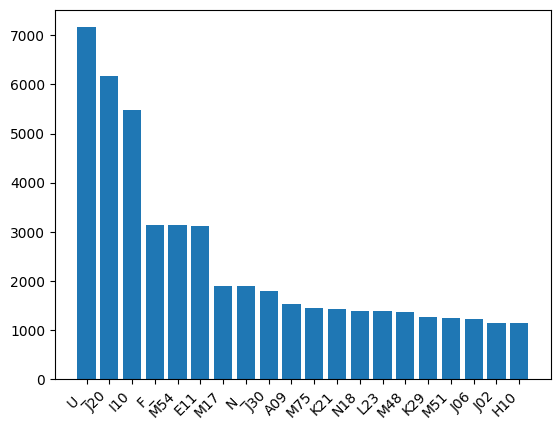

In [32]:
import matplotlib.pyplot as plt

plt.bar(up33_li.index[:20], up33_li.values[:20])
plt.xticks(rotation=45, ha='right')
plt.show()


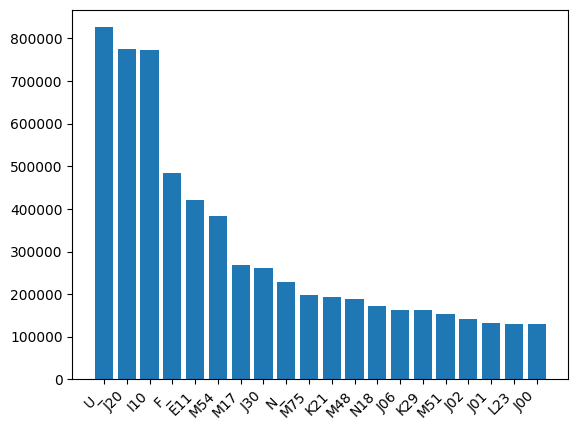

In [33]:
join_li = join.value_counts("주상병코드")

plt.bar(join_li.index[:20], join_li.values[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
ratio_up33_join = {}

for i in up33_li.index :
    ra = up33_li[i] / join_li[i]
    ratio_up33_join[i] = ra

ratio_up33_join

{'U_': 0.008670733760390285,
 'J20': 0.00795558711509909,
 'I10': 0.007083823738634453,
 'F_': 0.0064958543474083735,
 'M54': 0.00820016656180409,
 'E11': 0.007402353824906044,
 'M17': 0.0070665992595125866,
 'N_': 0.00829410838334879,
 'J30': 0.006887759008836547,
 'A09': 0.012762987336723501,
 'M75': 0.007404888546022981,
 'K21': 0.007391877691467662,
 'N18': 0.008100006377957778,
 'L23': 0.010640169508379803,
 'M48': 0.007321813679810432,
 'K29': 0.007800157977883096,
 'M51': 0.00810445745159838,
 'J06': 0.007447619628533959,
 'J02': 0.008092191670550353,
 'H10': 0.00969482094692022,
 'J01': 0.007774436090225564,
 'E78': 0.0076449490472278924,
 'J03': 0.0075229569927991015,
 'J00': 0.006915201854355804,
 'H52': 0.012281764608690862,
 'S33': 0.008504565094136737,
 'B35': 0.012587453961867855,
 'M79': 0.007815896330691036,
 'L50': 0.011262083417832759,
 'M47': 0.008395056365255544,
 'H04': 0.008270088146206991,
 'M77': 0.008684788277961743,
 'M65': 0.007780331043170922,
 'H66': 0.0101

In [35]:
sorted_dict = sorted(ratio_up33_join.items(), key= lambda item:item[1], reverse=True)
print(sorted_dict)



[('T63', 0.04174820613176777), ('T60', 0.04), ('Z43', 0.037383177570093455), ('T50', 0.0364963503649635), ('L55', 0.034482758620689655), ('T67', 0.028384279475982533), ('S10', 0.024793388429752067), ('T18', 0.023952095808383235), ('S07', 0.022058823529411766), ('R18', 0.021505376344086023), ('I79', 0.02145922746781116), ('L56', 0.021447721179624665), ('M89', 0.019630484988452657), ('I08', 0.019230769230769232), ('S69', 0.01858736059479554), ('I86', 0.01834862385321101), ('R72', 0.01818181818181818), ('S51', 0.01782388933226922), ('P05', 0.01775147928994083), ('L74', 0.01764705882352941), ('D04', 0.017543859649122806), ('C38', 0.016666666666666666), ('S21', 0.016091954022988506), ('K_', 0.01606425702811245), ('T22', 0.016050244242847175), ('K08', 0.016025641025641024), ('G60', 0.015748031496062992), ('T73', 0.015625), ('E16', 0.01532567049808429), ('J81', 0.015306122448979591), ('J93', 0.015267175572519083), ('E25', 0.015267175572519083), ('R14', 0.015174506828528073), ('S91', 0.0150515

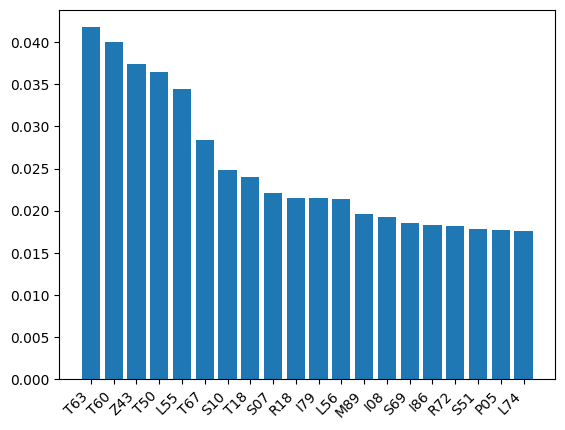

In [36]:
ratio_up33_join = {}

for i in up33_li.index :
    ra = up33_li[i] / join_li[i]
    ratio_up33_join[i] = ra

sorted_dict = sorted(ratio_up33_join.items(), key= lambda item:item[1], reverse=True)

x_bar = []
y_bar = []

for x in sorted_dict:
    x_bar.append(x[0])
    y_bar.append(x[1])

plt.bar(x_bar[:20], y_bar[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

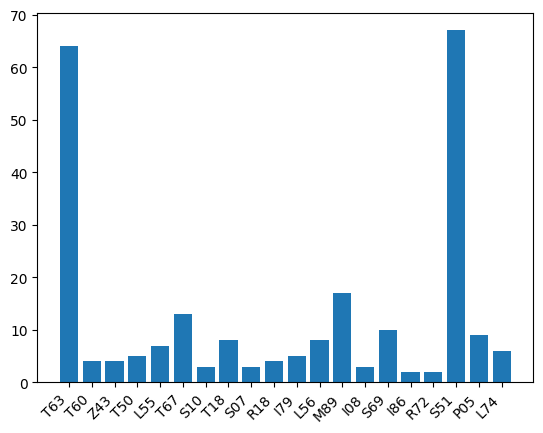

In [37]:
x_bar = []
y_bar = []

for x in sorted_dict:
    x_bar.append(x[0])
    y_bar.append(up33_li[x[0]])

plt.bar(x_bar[:20], y_bar[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

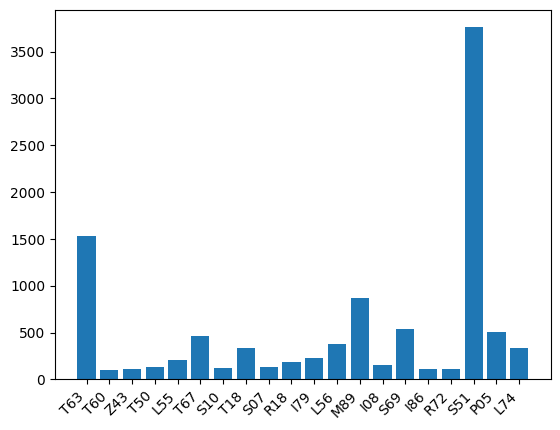

In [39]:
x_bar = []
y_bar = []

for x in sorted_dict:
    x_bar.append(x[0])
    y_bar.append(join_li[x[0]])

plt.bar(x_bar[:20], y_bar[:20])
plt.xticks(rotation=45, ha='right')
plt.show()